In [393]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np

In [404]:
def read_gff(path_to_file):
    
    names=['chromosome', 'source',
           'type', 'start', 'end', 
           'score', 'strand', 'phase',
           'attributes']
    
    gff = pd.read_csv(path_to_file, sep='\t',
                      comment='#', header=None,
                      names=names)
    
    return gff

In [405]:
df = read_gff('rrna_annotation.gff')
df.head()

,chromosome,source,type,start,end,score,strand,phase,attributes
0,Reference_10,barrnap:0.9,rRNA,67122,68652,0.0,+,.,Name=16S_rRNA;product=16S ribosomal RNA
1,Reference_10,barrnap:0.9,rRNA,68981,72061,0.0,+,.,Name=23S_rRNA;product=23S ribosomal RNA
2,Reference_10,barrnap:0.9,rRNA,469298,470826,0.0,+,.,Name=16S_rRNA;product=16S ribosomal RNA
3,Reference_10,barrnap:0.9,rRNA,471166,474246,0.0,+,.,Name=23S_rRNA;product=23S ribosomal RNA
4,Reference_10,barrnap:0.9,rRNA,3629599,3632680,0.0,-,.,Name=23S_rRNA;product=23S ribosomal RNA


In [395]:
def read_bed6(path_to_file):
    
    names=['chromosome', 'start', 'end', 
           'name', 'score', 'strand']
    
    bed6 = pd.read_csv(path_to_file, 
                       sep='\t', header=None, 
                      names=names)
    
    return bed6

In [396]:
read_bed6('alignment.bed').head()

,chromosome,start,end,name,score,strand
0,Reference_1,197681,200286,NODE_1445_length_2603_cov_1135.593799,41,-
1,Reference_1,202886,202996,NODE_19543_length_110_cov_1549.290909,0,-
2,Reference_1,202941,203377,NODE_5666_length_436_cov_418.653543,16,+
3,Reference_1,203322,785222,NODE_25_length_581906_cov_146.024228,60,+
4,Reference_1,785169,1763981,NODE_11_length_978812_cov_132.517515,60,-


In [397]:
#замена строк в столбце attributes
df['attributes'] = df['attributes'].str.replace(r'^Name=16S.*', '16S', regex=True) 
df['attributes'] = df['attributes'].str.replace(r'^Name=23S.*', '23S', regex=True) 
df['attributes'] = df['attributes'].str.replace(r'^Name=5S.*', '5S', regex=True) 
df.head()

,chromosome,source,type,start,end,score,strand,phase,attributes
0,Reference_10,barrnap:0.9,rRNA,67122,68652,0.0,+,.,16S
1,Reference_10,barrnap:0.9,rRNA,68981,72061,0.0,+,.,23S
2,Reference_10,barrnap:0.9,rRNA,469298,470826,0.0,+,.,16S
3,Reference_10,barrnap:0.9,rRNA,471166,474246,0.0,+,.,23S
4,Reference_10,barrnap:0.9,rRNA,3629599,3632680,0.0,-,.,23S


In [398]:
df_group_rrna = df.groupby(['chromosome', 'attributes'])['attributes'].count().reset_index(name='count')

df_group_rrna

,chromosome,attributes,count
0,Reference_1,16S,2
1,Reference_1,23S,2
2,Reference_1,5S,2
3,Reference_10,16S,5
4,Reference_10,23S,5
...,...,...,...
71,Reference_8,16S,2
72,Reference_8,23S,2
73,Reference_9,16S,6
74,Reference_9,23S,6


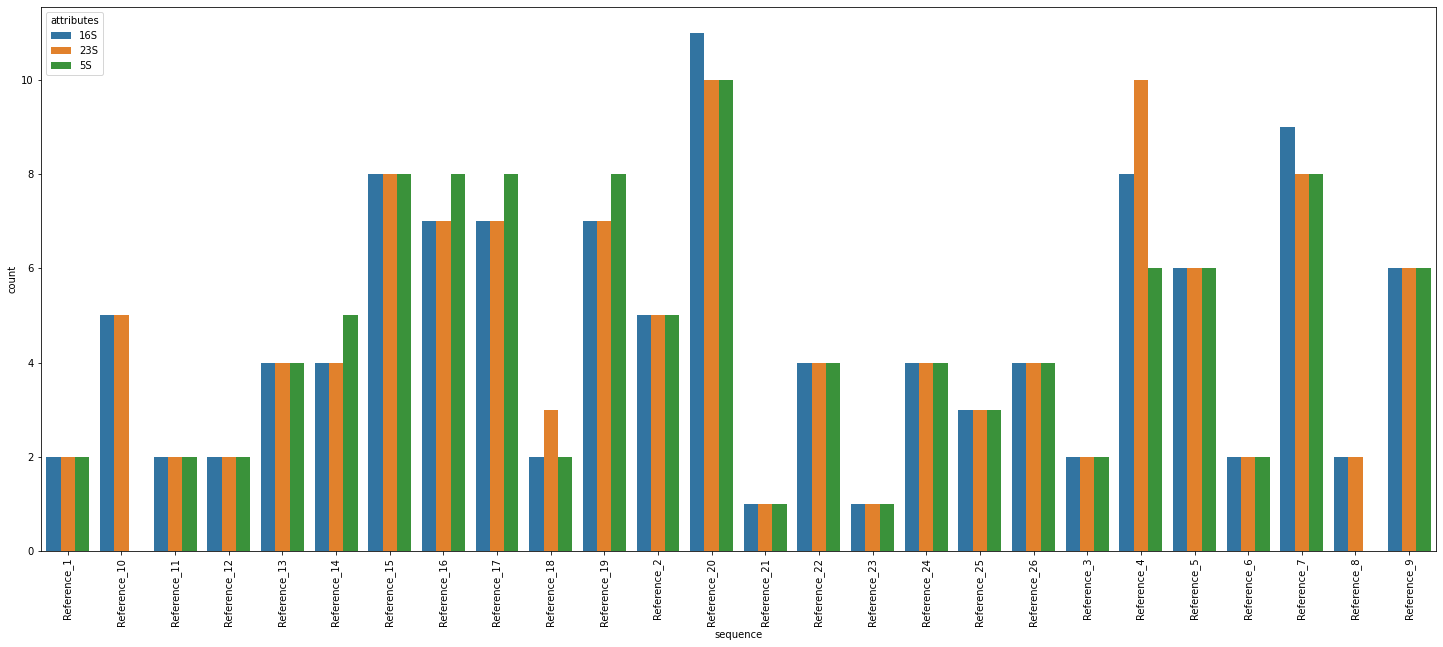

In [399]:
plt.subplots(figsize=(25, 10))
sns.barplot(x='chromosome', y='count', hue='attributes',data=df_group_rrna).set(xlabel='sequence')
plt.xticks(rotation=90);

In [400]:
#intersect

In [401]:
diffexpr = pd.read_table('diffexpr_data.tsv')
#разбиение по цветам на графике
def map_color(df):
    logFC, Sample, log_pval = df
    
    if logFC < 0 and log_pval > 1:
        return 'Significantly downregulated'
    elif logFC < 0 and log_pval < 1:
        return 'Non-significantly downregulated'
    elif logFC > 0 and log_pval > 1:
        return 'Significantly upregulated'
    elif logFC > 0 and log_pval < 1:
        return 'Non-significantly upregulated'
    

diffexpr['color'] = diffexpr[['logFC', 'Sample', 'log_pval']].apply(map_color, axis = 1)
diffexpr.head()

,Sample,logFC,pval,pval_corr,log_pval,color
0,PNLIP,10.092524,0.659033,1.0,-0.0,Non-significantly upregulated
1,CELA2A,8.691414,0.582390,1.0,-0.0,Non-significantly upregulated
2,CLPS,8.054078,0.651733,1.0,-0.0,Non-significantly upregulated
3,MPO,7.817773,0.448334,1.0,-0.0,Non-significantly upregulated
4,AMY2A,7.285231,0.632441,1.0,-0.0,Non-significantly upregulated


In [402]:
texts = []

sd = diffexpr[diffexpr["color"] == 'Significantly downregulated'] #Significantly downregulated
su = diffexpr[diffexpr["color"] == 'Significantly upregulated'] #Significantly upregulated


/Users/miracle/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


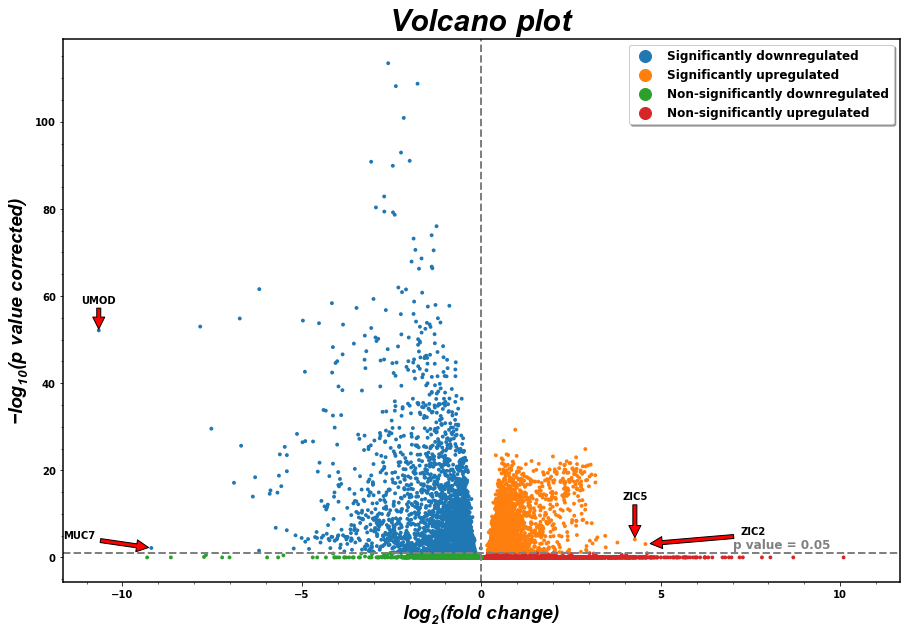

In [403]:
plt.figure(figsize=(15,10))
ax = sns.scatterplot(data=diffexpr, x='logFC', y='log_pval',
                    hue='color', hue_order=['Significantly downregulated',
                                           'Significantly upregulated', 
                                           'Non-significantly downregulated',
                                           'Non-significantly upregulated'],
                    s=15, linewidth=0)

ax.axhline(1, color='gray', ls='--', lw=2)
ax.axvline(0, color='gray', ls='--', lw=2)
plt.text(7, 2, "p value = 0.05", horizontalalignment='left',
         size='large', color='grey', weight='semibold')

plt.rcParams['mathtext.fontset'] = 'custom'
plt.rcParams['mathtext.bf'] = 'Arial:italic:bold'
plt.title('$\mathbf{Volcano}$ $\mathbf{plot}$', size=30)
plt.xlabel('$\mathbf{log_2 (fold\ change)}$', size=19)
plt.ylabel('$\mathbf{-log_{10} (p}$ $\mathbf{value\ corrected)}$', size=19)
ax.minorticks_on()
plt.xticks(np.arange(-10, 11, 5.0), size=10, weight='semibold')
plt.yticks(np.arange(0, 110, 20.0), size=10, weight='semibold')

#подсчет чисел для лимитов
a=min(diffexpr['logFC'])
b=max(diffexpr['logFC'])
l= max(abs(a), abs(b)) + 1
plt.xlim([-l, l])

#смена толщины осей
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(1.5)
    
#легенда
plt.legend(prop={'weight': 'bold', 
                 'family': 'Sans-serif',
                'size': 12},
          markerscale=2.0, shadow=True)

#аннотация
for i in range(len(su)):
    if su.iloc[i].logFC == max(su.logFC):

        ax.annotate(su.iloc[i].Sample,
            xy=(su.iloc[i].logFC, su.iloc[i].log_pval),
            xytext=(su.iloc[i].logFC+3, su.iloc[i].log_pval+3),
            va='center',
            ha='center',
            arrowprops={'facecolor':'red', 'shrink':0.05},
                   weight='bold')
        
        su.iloc[i,1] = 0
        break
        
for i in range(len(su)):
    if su.iloc[i].logFC == max(su.logFC):
        ax.annotate(su.iloc[i].Sample,
            xy=(su.iloc[i].logFC, su.iloc[i].log_pval),
            xytext=(su.iloc[i].logFC, su.iloc[i].log_pval+10),
            va='center',
            ha='center',
            arrowprops={'facecolor':'red', 'shrink':0.05},
                   weight='bold')

for j in range(len(sd)):
    if sd.iloc[j].logFC == min(sd.logFC):
        ax.annotate(sd.iloc[j].Sample,
            xy=(sd.iloc[j].logFC, sd.iloc[j].log_pval),
            xytext=(sd.iloc[j].logFC, sd.iloc[j].log_pval+7),
            va='center',
            ha='center',
            arrowprops={'facecolor':'red', 'shrink':0.05},
                   weight='bold')
        sd.iloc[j,1] = 0
        break
        
for j in range(len(sd)):
    if sd.iloc[j].logFC == min(sd.logFC):
        ax.annotate(sd.iloc[j].Sample,
            xy=(sd.iloc[j].logFC, sd.iloc[j].log_pval),
            xytext=(sd.iloc[j].logFC-2, sd.iloc[j].log_pval+3),
            va='center',
            ha='center',
            arrowprops={'facecolor':'red', 'shrink':0.05},
                   weight='bold');